In [143]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from read_all_data import categories

Kategorie wykluczone z analiz, ze względu na rozmiar plików:

- Books (4.7 GB),

- Movies\_&\_TV (2.9 GB),

- Music (2.2 GB).

1. Potrzebna mi pełna ramka danych, żeby na niej sensownie robić jakieś analizy!

In [90]:
def provide_summary_for_all(categories):
    summaries = {}
    for categ in categories:
        print(f"Processing: {categ}")
        df = pd.read_csv(f"data/raw/{categ}.csv")
        df.drop("Unnamed: 0", axis=1, inplace=True)
        df["year"] = df['time'].astype('datetime64[ns]').dt.year
        
        # number of unique values
        df_counts = df.groupby("year").nunique()
        df_counts = pd.concat([df_counts, pd.DataFrame(df.drop("year", axis=1).nunique()).transpose()])
        df_counts
        
        # proportion of scores
        df_scores = df[["year", "score", 'time']].groupby(["year", "score"]).count().reset_index().pivot("year", "score", "time").fillna(0).astype(int)
        df_scores["all"]  = df_scores.sum(axis=1)
        df_scores[[1.0, 2.0, 3.0, 4.0, 5.0]] = df_scores[[1.0, 2.0, 3.0, 4.0, 5.0]].apply(lambda x: x / df_scores.loc[x.index, "all"], axis=0)
        df_scores
        
        # averagre number fo opinions
        df_avg = df_counts[["productId", "userId"]].apply(lambda x: df_counts.loc[x.index, "time"] / x, axis=0)
        summaries[categ] = [df_counts, df_scores, df_avg]
    return summaries

In [92]:
summaries = provide_summary_for_all(categories)

Amazon_Instant_Video
Arts
Automotive
Baby
Beauty
Cell_Phones_&_Accessories
Clothing_&_Accessories
Electronics
Gourmet_Foods
Health
Home_&_Kitchen
Industrial_&_Scientific
Jewelry
Kindle_Store
Musical_Instruments
Office_Products
Patio
Pet_Supplies
Shoes
Software
Sports_&_Outdoors
Tools_&_Home_Improvement
Toys_&_Games
Video_Games
Watches


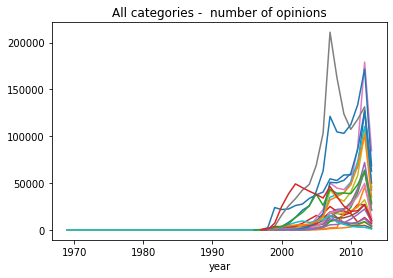

In [153]:
for categ in summaries.keys():
    summaries[categ][1]["all"].plot()
plt.title(f"All categories -  number of opinions")
plt.show()

Fisrt observation: **outliers** (reviews before 1998)

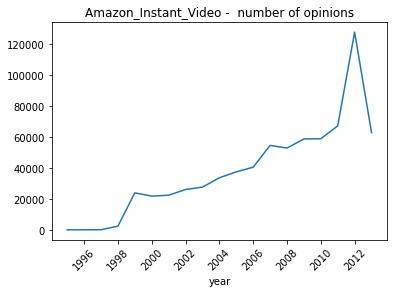

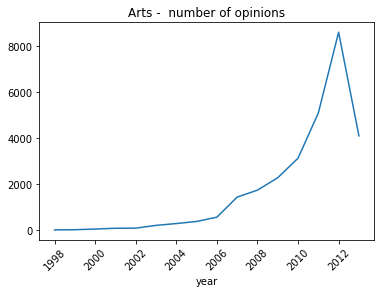

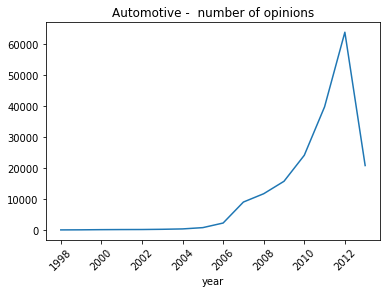

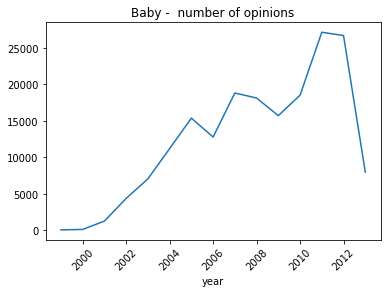

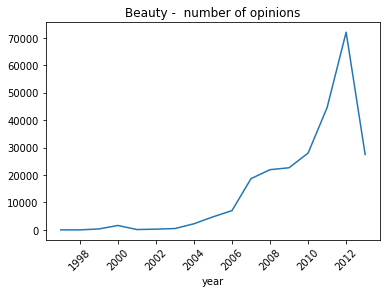

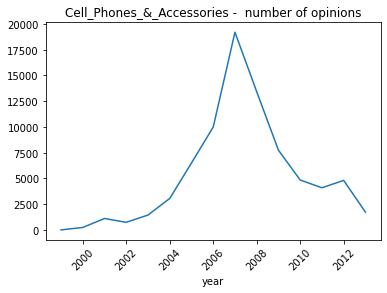

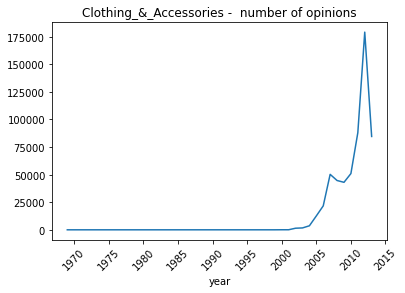

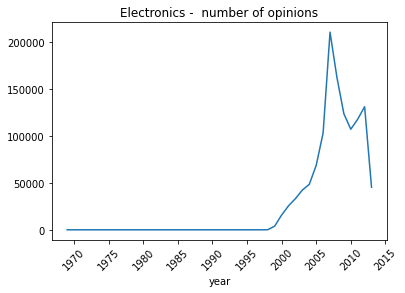

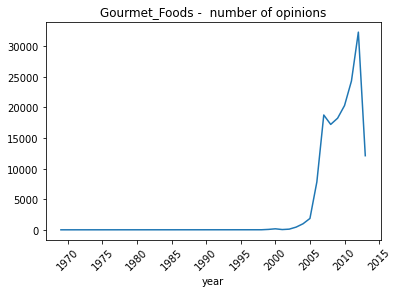

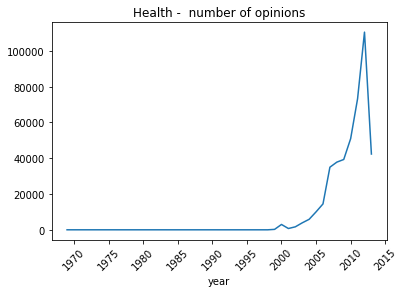

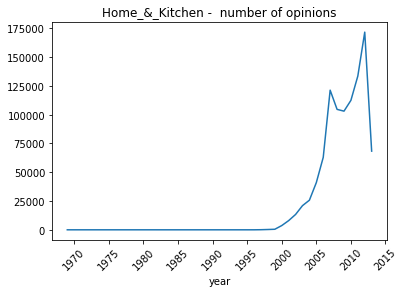

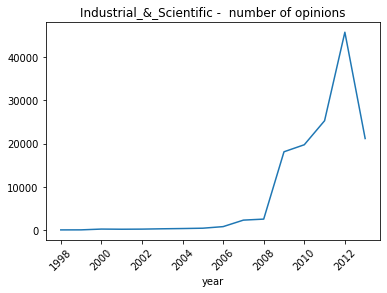

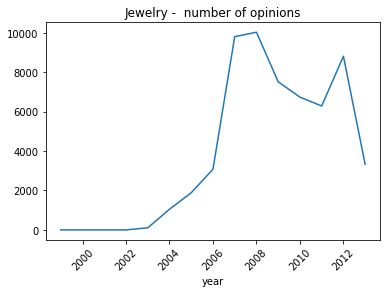

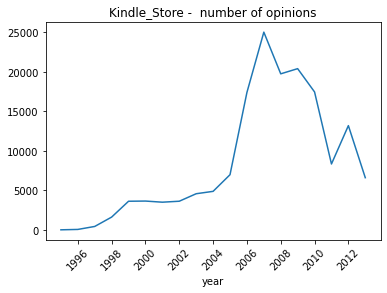

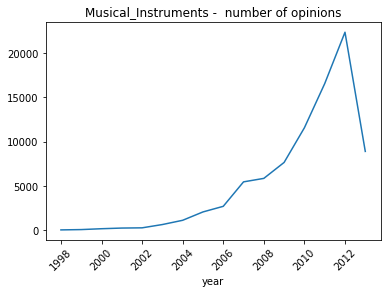

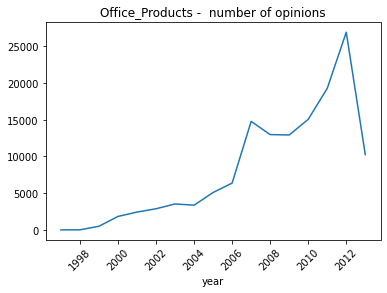

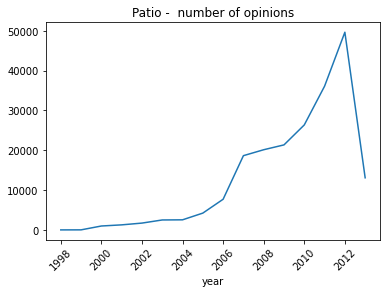

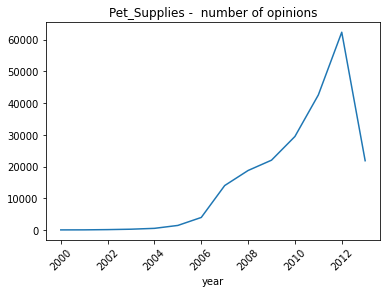

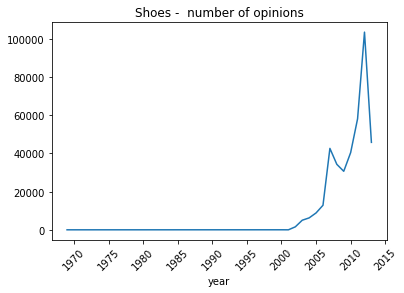

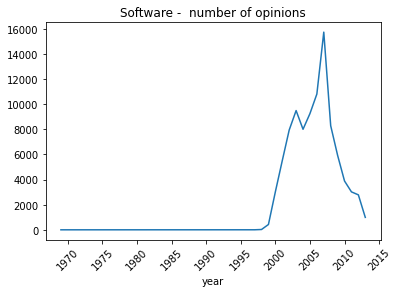

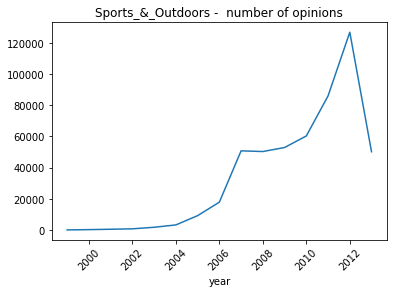

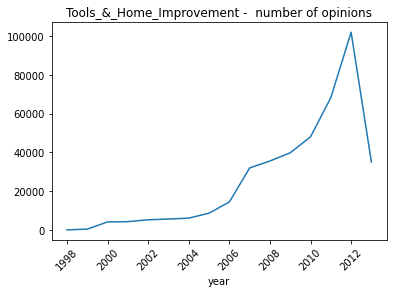

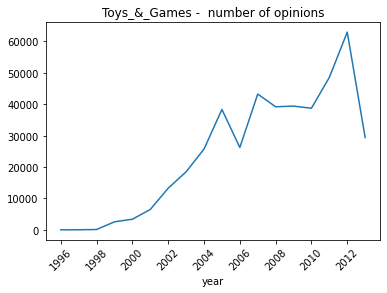

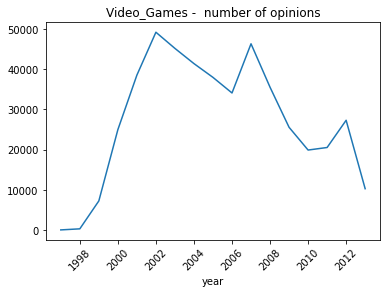

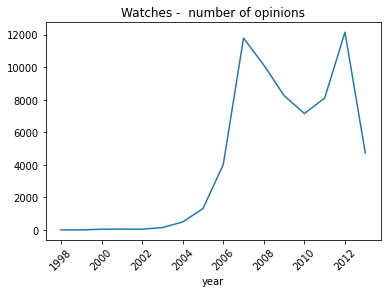

In [156]:
for categ in summaries.keys():
    summaries[categ][1]["all"].plot()
    plt.title(f"{categ} -  number of opinions")
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(rotation=45)
    plt.show()

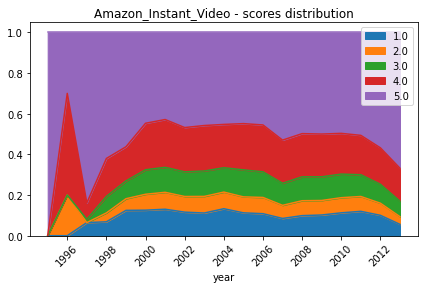

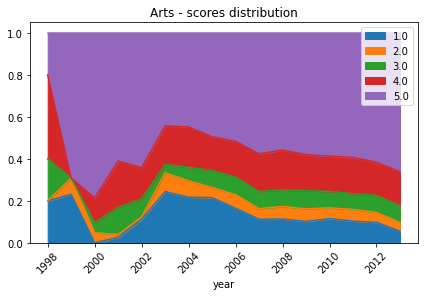

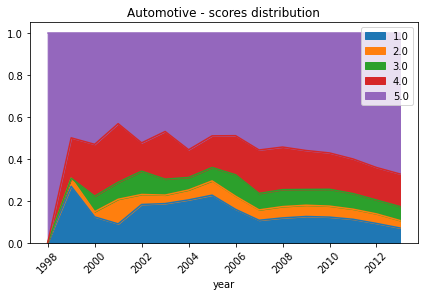

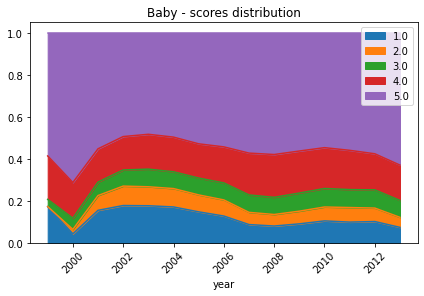

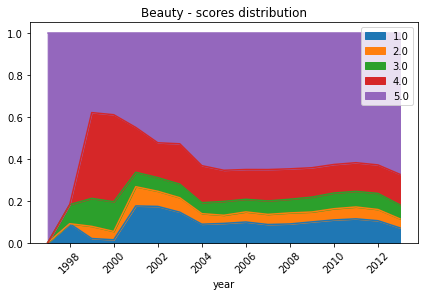

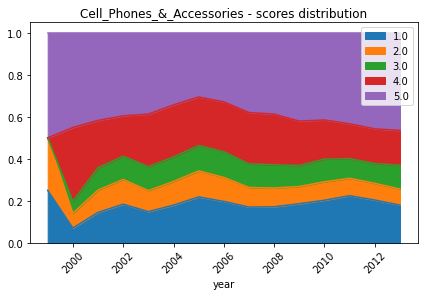

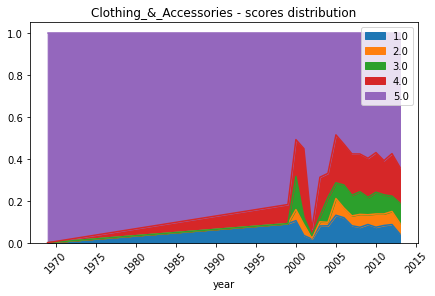

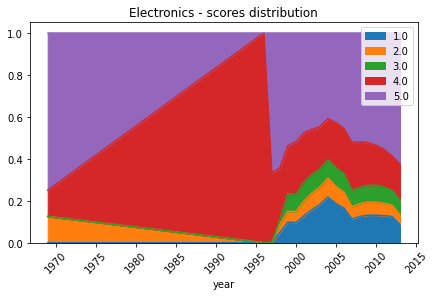

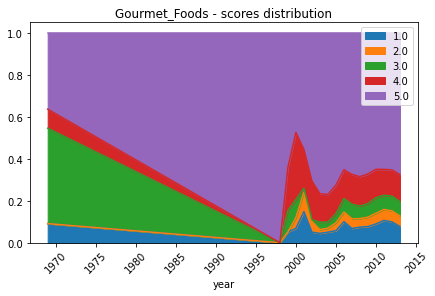

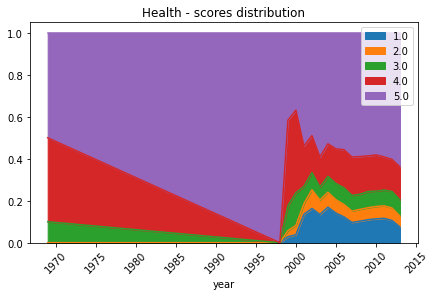

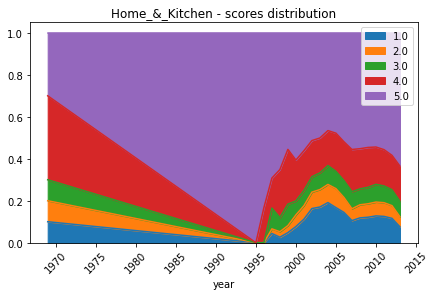

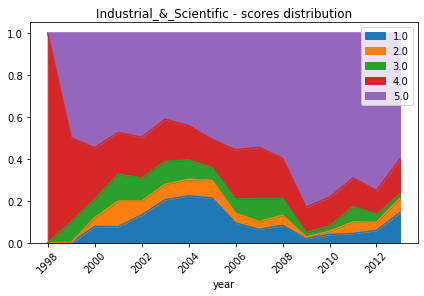

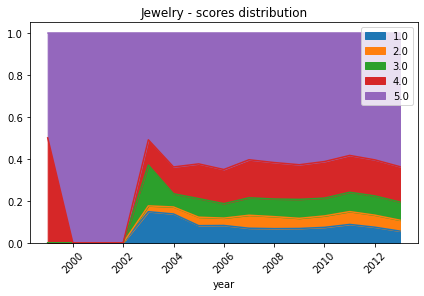

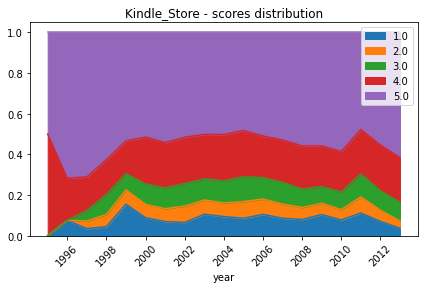

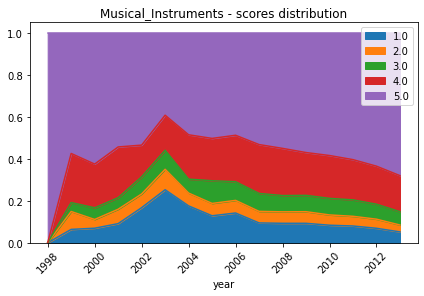

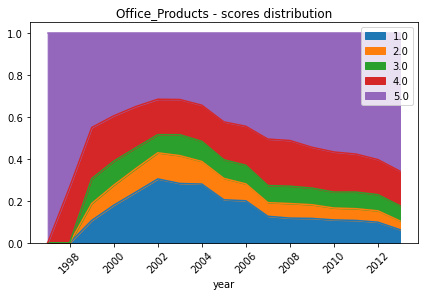

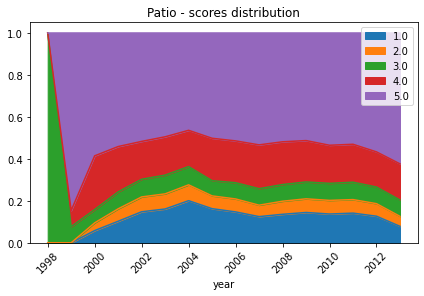

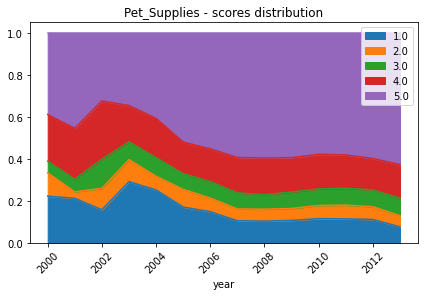

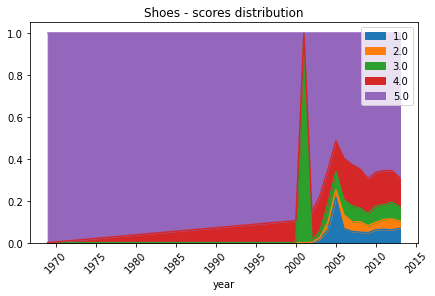

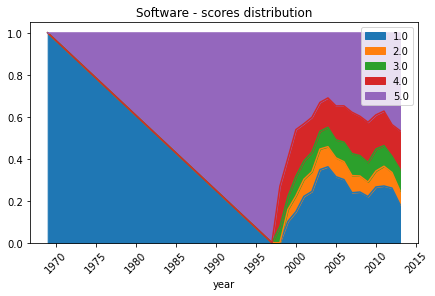

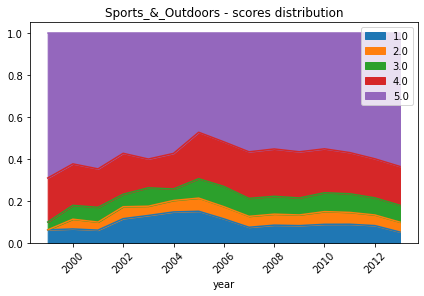

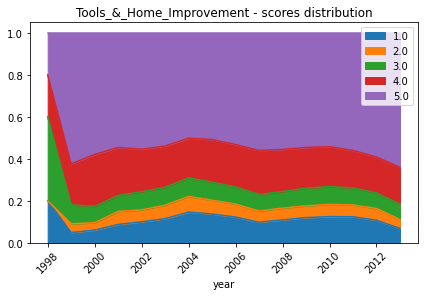

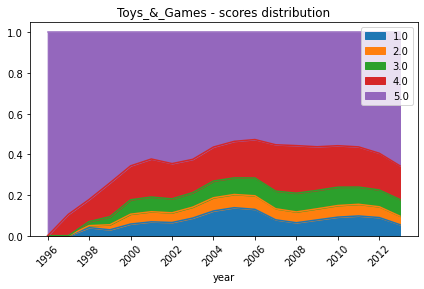

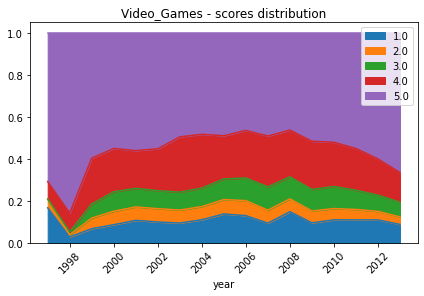

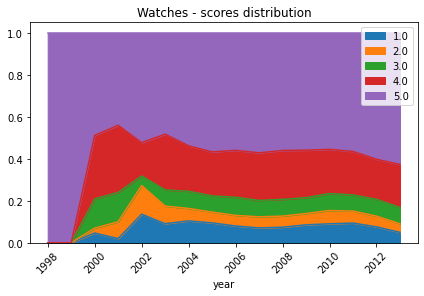

In [147]:
for categ in summaries.keys():
    data_to_plot = summaries[categ][1].drop("all", axis=1)
#     data_to_plot.index = data_to_plot.index.astype(str)
    data_to_plot.plot(kind = "area", legend="reverse")
    

In [ ]:
"""
czy najpopularbniejsze produkty maja staly rozklad w czasie?
"""

In [ ]:
""" done in separate script
produce a data frame:
- reviewID
- reviewDate
- userID
- category
- score
- helpfull
- allVotes
"""

In [ ]:
"""
Podstawowe info:
- liczba opinii
- liczba użytkowników
- liczba produktów
"""

In [1]:
"""
liczba i rozkład ocen w poszczególnych kategoriach - czy we wszystkich kategoriach klasy są tak samo niezbalansowane
"""

'\nrozkład ocen w poszczególnych kategoriach - czy we wszystkich kategoriach klasy są tak samo niezbalansowane\n'

In [2]:
"""
rozkład scorów w kolejnych latach dla wszytskich i dla kazdej kategorii - czy rozkład ocen jest stabilny w czasie
"""

'\nrozkład scorów w kolejnych latach dla wszytskich i dla kazdej kategorii - czy rozkład ocen jest stabilny w czasie\n'

In [ ]:
"""
rozkład liczby ocenionych produktów dla userów
"""

In [3]:
"""
rozkład liczby ocen uzyskanych przez produkt
"""

'\nrozkład liczby ocen uzyskanych przez produkt\n'

In [4]:
"""
proponowany zakres (wybór kategorii i wykluczenia)
"""

'\nproponowany zakres (wybór kategorii i wykluczenia)\n'

In [ ]:
"""
Powtórzenie analiz na wyczyszczonych danych
"""